In [1]:
#STEP1: Loading and Preprocessing Data
import pandas as pd
import os
for dirname, _, filenames in os.walk(r"D:/Important/PAPERS/BOTHO/Cypto"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/Important/PAPERS/BOTHO/Cypto\final-anormal-data-set.csv
D:/Important/PAPERS/BOTHO/Cypto\final-complete-data-set.csv
D:/Important/PAPERS/BOTHO/Cypto\final-normal-data-set.csv


In [2]:
df_na = pd.read_csv(r"D:/Important/PAPERS/BOTHO/Cypto/final-complete-data-set.csv") # this is the total dataset
df_a = pd.read_csv(r"D:/Important/PAPERS/BOTHO/Cypto/final-anormal-data-set.csv") # problematic records
df_n = pd.read_csv(r"D:/Important/PAPERS/BOTHO/Cypto/final-normal-data-set.csv")  # non-problematic records
df_a['flag'] = 1 # 1 for problem
df_n['flag'] = 0 # 0 for no problem
df = pd.concat([df_a, df_n], axis = 0) # adding the records
print(df.shape)
print(df.shape)

C:\Users\sindh\AppData\Local\Temp\ipykernel_32948\1042142241.py:1: DtypeWarning: Columns (14,19,26,27,52,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df_na = pd.read_csv(r"D:/Important/PAPERS/BOTHO/Cypto/final-complete-data-set.csv") # this is the total dataset
C:\Users\sindh\AppData\Local\Temp\ipykernel_32948\1042142241.py:2: DtypeWarning: Columns (14,19,26,27,52,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df_a = pd.read_csv(r"D:/Important/PAPERS/BOTHO/Cypto/final-anormal-data-set.csv") # problematic records


(95312, 83)
(95312, 83)


In [3]:
list15 = []
for var in df.columns:
    if df[var].isnull().sum()>df.shape[0]*15/100:
        list15.append(var)
list15 # all columns have less than 15% missing values 

[]

In [4]:
list0 = []
for var in df.columns:
    if (df[var].isnull().sum()>0):
        list0.append(var)
len(list0) # only 26 columns have some missing value

26

In [5]:
for var in list0:
    df = df[~df[var].isnull()] # dropping these rows
list0 = []

for var in df.columns:
    if (df[var].isnull().sum()>0):
        list0.append(var)
list0 
# there are no more null values now

[]

In [6]:
def vardefiner(df):
    lst = df.columns
    l = []
    l_i = []
    l_f = []
    l_c = []
    l_b = []
    for var in lst:
        if df[var].dtype=='O':
            l_b.append(var)
        elif (len(df[var].unique())<=2)&(df[var].dtype=='O'):
            l_c.append(var)
        elif df[var].dtype=='float':
            l_f.append(var)
        else:
            l_i.append(var)
        
    l = [l_b,l_c,l_f,l_i]
    return(l)

In [7]:
varlist = vardefiner(df) # a function to classify the variables
binary_vars = varlist[0]
cat_vars = varlist[1]
float_vars = varlist[2] # useful for inspecting variables
int_vars = varlist[3]
numlist = int_vars + float_vars
stringlist = binary_vars + cat_vars

In [8]:
for var in numlist: # these columns don't have any information
    if df[var].sum()==0:
        df.drop(var, axis = 1, inplace = True)

In [9]:
varlist = vardefiner(df) # a function to classify the variables
binary_vars = varlist[0]
cat_vars = varlist[1]
float_vars = varlist[2]
int_vars = varlist[3]
numlist = int_vars + float_vars
stringlist = binary_vars + cat_vars

In [10]:
for var in numlist: # these columns don't have any information
    if df[var].sum()==0:
        df.drop(var, axis = 1, inplace = True)

In [11]:
for var in stringlist:
    if var in df.columns and len(df[var].unique()) == 1:
        df.drop(var, axis=1, inplace=True)


In [12]:
varlist = vardefiner(df) # a function to classify the variables
binary_vars = varlist[0]
cat_vars = varlist[1]
float_vars = varlist[2]
int_vars = varlist[3]
numlist = int_vars + float_vars
stringlist = binary_vars + cat_vars

In [13]:
for var in stringlist:
    print(var, df[var].unique(), df[var].dtypes) 
    # there are some numerics in cat_vars

diskio_sda1_time_since_update ['1' '1.0228629112243652' '1.0591349601745603' ... 1.101564884185791
 1.1031060218811035 1.0847859382629397] object
diskio_sda_time_since_update ['1' '1.0228629112243652' '1.0591349601745603' ... 1.101564884185791
 1.1031060218811035 1.0847859382629397] object
fs_/_device_name ['/dev/mapper/centos-root' '/dev/sda1'] object
fs_/_percent ['95.7' '95.8' '95.9' '96' '96.1' '96.7' '96.6' '96.8' '96.9' '95.1'
 '43.4' '43.5' 43.5 34.5 34.6 47.0 47.1 47.2 30.6 30.7 30.8 30.9 23.6 23.7
 23.8 25.5 25.6 25.7] object
fs_/_size ['4708106240' 4708106240 10725883904] object
network_lo_cx ['200' '0' '288' 0 656 288.0] object
network_lo_tx ['100' '0' '144' 0 328 144.0] object
system_hostname ['localhost.localdomain' 'vm1-graph-analytics' 'vm2-node' 'vm3-tomcat'
 'vm4-web-server'] object
system_os_version ['3.10.0-1062.12.1.el7.x86_64' '3.10.0-1062.el7.x86_64'] object
timestamp ['2020-03-20 09:16:03' '2020-03-20 09:16:05' '2020-03-20 09:16:06' ...
 '2020-01-29 22:52:13' '20

In [14]:
stringlist.remove('system_os_version')
stringlist.remove('fs_/_device_name')
stringlist.remove('system_hostname')
stringlist.remove('timestamp') # removing the original cat vars

In [15]:
for var in stringlist:
    df[var] = df[var].astype(float) # converting the remaining variables
varlist = vardefiner(df) # a function to classify the variables
binary_vars = varlist[0]
cat_vars = varlist[1]
float_vars = varlist[2]
int_vars = varlist[3]
numlist = int_vars + float_vars
stringlist = binary_vars + cat_vars

In [16]:
numlist.remove('flag')
cpu = []
diskio = []
mem = []
network = []
load = []
fs = []
processcount = []

In [17]:
for var in numlist:
    if (var[:3] == 'cpu')or(var[3:6]=='cpu'):
        cpu.append(var)
    elif var[:3] == 'mem':
        mem.append(var)
    elif var[:6] == 'diskio':
        diskio.append(var)
    elif var[:7] == 'network':
        network.append(var)
    elif var[:4] == 'load':
        load.append(var)
    elif var[:3] == 'pro':
        processcount.append(var)
    else:
        fs.append(var)  # dividing the numeric types baased on their types
for var in stringlist:
    print(var, df[var].unique(), ) # remaining object types

fs_/_device_name ['/dev/mapper/centos-root' '/dev/sda1']
system_hostname ['localhost.localdomain' 'vm1-graph-analytics' 'vm2-node' 'vm3-tomcat'
 'vm4-web-server']
system_os_version ['3.10.0-1062.12.1.el7.x86_64' '3.10.0-1062.el7.x86_64']
timestamp ['2020-03-20 09:16:03' '2020-03-20 09:16:05' '2020-03-20 09:16:06' ...
 '2020-01-29 22:52:13' '2020-01-29 22:52:14' '2020-01-29 22:52:15']


In [18]:
from datetime import datetime#we will see how certain variables act over the timeline

df['datetime'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df.shape

(95310, 61)

In [19]:
df.drop('timestamp', axis = 1, inplace = True)
df['datetime']

0       2020-03-20 09:16:03
1       2020-03-20 09:16:05
2       2020-03-20 09:16:06
3       2020-03-20 09:16:07
4       2020-03-20 09:16:08
                ...        
80846   2020-01-29 22:52:11
80847   2020-01-29 22:52:12
80848   2020-01-29 22:52:13
80849   2020-01-29 22:52:14
80850   2020-01-29 22:52:15
Name: datetime, Length: 95310, dtype: datetime64[ns]

In [20]:
binary_vars.remove('timestamp')
stringlist.remove('timestamp')

In [21]:
#Inspection
#Load Variables
df[load].describe()
df_lu = df[df['load_cpucore']>1]

In [22]:
df[df['load_cpucore']>1].load_min1.describe()
df_lu[load].describe()

,load_cpucore,load_min1,load_min15,load_min5
count,4309.0,4309.000000,4309.000000,4309.000000
mean,2.0,3.680733,3.135024,3.545523
std,0.0,0.412826,0.899465,0.621365
min,2.0,0.960000,0.180000,0.420000
25%,2.0,3.600000,2.890000,3.670000
50%,2.0,3.730000,3.600000,3.740000
75%,2.0,3.860000,3.700000,3.790000
max,2.0,4.650000,3.800000,4.000000


In [23]:
df_ld = df[df['load_cpucore']<=1]
df_ld[load].describe()

,load_cpucore,load_min1,load_min15,load_min5
count,91001.0,91001.000000,91001.000000,91001.000000
mean,1.0,1.333823,1.264140,1.315291
std,0.0,1.412298,1.334691,1.380397
min,1.0,0.000000,0.050000,0.020000
25%,1.0,0.170000,0.200000,0.190000
50%,1.0,0.410000,0.250000,0.300000
75%,1.0,2.740000,2.550000,2.960000
max,1.0,5.550000,4.200000,4.510000


In [24]:
#CPU feature Variables
df[cpu].describe()

,cpu_idle,cpu_iowait,cpu_nice,cpu_softirq,cpu_system,cpu_total,cpu_user,percpu_0_idle,percpu_0_iowait,percpu_0_nice,percpu_0_softirq,percpu_0_system,percpu_0_total,percpu_0_user
count,95310.000000,95310.000000,95310.000000,95310.000000,95310.000000,95310.000000,95310.000000,95310.000000,95310.000000,95310.000000,95310.000000,95310.000000,95310.000000,95310.000000
mean,50.092828,0.003336,0.004094,0.068612,3.348626,49.934123,39.904601,50.047247,0.003525,0.004084,0.054764,3.317834,49.952753,39.124444
std,45.256183,0.057063,0.466298,0.271454,1.521660,45.247559,41.977910,45.259543,0.068033,0.466377,0.234905,1.553371,45.259543,41.011366
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.300000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,2.500000,8.300000,5.500000,0.000000,0.000000,0.000000,0.000000,2.500000,8.300000,5.500000
50%,88.900000,0.000000,0.000000,0.000000,2.800000,11.100000,7.300000,88.900000,0.000000,0.000000,0.000000,2.800000,11.100000,7.300000
75%,91.700000,0.000000,0.000000,0.000000,3.700000,100.000000,95.200000,91.700000,0.000000,0.000000,0.000000,3.700000,100.000000,94.500000
max,94.300000,3.600000,75.500000,3.000000,48.000000,100.000000,99.200000,96.700000,10.000000,74.500000,3.000000,26.800000,100.000000,100.000000


In [25]:
df[df['cpu_user']>=95].shape

(25439, 60)

In [26]:
df[df['cpu_iowait']>0].shape

(344, 60)

In [27]:
df[df['cpu_nice']>0].shape

(59, 60)

In [28]:
df[df['cpu_softirq']>0].shape

(6310, 60)

'''The CPU variables are devided into two matrices, cpu and percpu
Each of them have these variables
idle
iowait*
nice*
softirq*
system
total
user
In these the starred variables are irksome, because
few of the rows display suspicious behaviour, meaning they are not statistically regular with the remaining data
We will flag the records that show these divergent tendencies'''

In [29]:
cpuflags = ['cpu_iowait','cpu_nice','cpu_softirq','percpu_0_iowait','percpu_0_nice','percpu_0_softirq']

def flaglist(x):
    if x>0:
        return 1
    else:
        return 0
for var in cpuflags:
    df[var+'_flag'] = df[var].apply(flaglist)

In [30]:
#DISKio variables
df[diskio].describe()# we see the same tendencies here aswell

,diskio_sda1_write_bytes,diskio_sda_write_bytes,diskio_sda1_read_bytes,diskio_sda1_time_since_update,diskio_sda_read_bytes,diskio_sda_time_since_update
count,9.531000e+04,9.531000e+04,95310.000000,95310.000000,9.531000e+04,95310.000000
mean,1.925485e+04,2.341422e+04,6.403357,1.162641,2.191023e+03,1.162641
std,1.212751e+05,1.887162e+05,1481.391724,0.121199,1.378945e+05,0.121199
min,0.000000e+00,0.000000e+00,0.000000,0.652700,0.000000e+00,0.652700
25%,0.000000e+00,0.000000e+00,0.000000,1.087129,0.000000e+00,1.087129
50%,0.000000e+00,0.000000e+00,0.000000,1.093017,0.000000e+00,1.093017
75%,0.000000e+00,0.000000e+00,0.000000,1.209975,0.000000e+00,1.209975
max,3.051520e+06,3.473408e+07,454656.000000,2.127072,1.922662e+07,2.127072


In [31]:
df[df['diskio_sda1_write_bytes']>7*(10**4)].shape

(3984, 66)

In [32]:

'''Problem Variables
diskio_sda1_write_bytes
diskio_sda1_write_bytes
diskio_sda1_read_bytes
diskio_sda_read_bytes'''

ioflags = ['diskio_sda1_write_bytes','diskio_sda1_write_bytes']
ioflags1 = ['diskio_sda1_read_bytes','diskio_sda_read_bytes']
dfx = df[df['diskio_sda1_write_bytes']>0]
dfx[diskio].describe()

,diskio_sda1_write_bytes,diskio_sda_write_bytes,diskio_sda1_read_bytes,diskio_sda1_time_since_update,diskio_sda_read_bytes,diskio_sda_time_since_update
count,1.631100e+04,1.631100e+04,16311.000000,16311.000000,16311.000000,16311.000000
mean,1.125118e+05,1.125118e+05,9.291398,1.201828,9.291398,1.201828
std,2.746860e+05,2.746860e+05,386.092388,0.142082,386.092388,0.142082
min,4.096000e+03,4.096000e+03,0.000000,1.074106,0.000000,1.074106
25%,1.228800e+04,1.228800e+04,0.000000,1.087478,0.000000,1.087478
50%,2.457600e+04,2.457600e+04,0.000000,1.096492,0.000000,1.096492
75%,6.553600e+04,6.553600e+04,0.000000,1.356405,0.000000,1.356405
max,3.051520e+06,3.051520e+06,16384.000000,1.679426,16384.000000,1.679426


In [33]:
df[df['diskio_sda1_read_bytes']>0].shape
for var in ioflags:
    df[var+'_flag'] = df[var].apply(flaglist)
def flaglist1(x):
    if x>7*(10**4):
        return 1
    else:
        return 0
for var in ioflags1:
    df[var+'_flag'] = df[var].apply(flaglist1)

In [34]:
#Memory Variables
df[mem].describe()

,mem_active,mem_available,mem_cached,mem_free,mem_inactive,mem_used,memswap_free,memswap_sin,memswap_sout,memswap_total,memswap_used,mem_buffers,mem_percent,mem_shared,mem_total,memswap_percent
count,9.531000e+04,9.531000e+04,9.531000e+04,9.531000e+04,9.531000e+04,9.531000e+04,9.531000e+04,95310.000000,9.531000e+04,9.531000e+04,9.531000e+04,9.531000e+04,95310.000000,9.531000e+04,9.531000e+04,95310.000000
mean,7.304257e+08,2.643991e+09,1.126026e+09,2.643991e+09,4.683325e+08,1.014084e+09,9.789841e+07,1407.621278,8.791848e+04,9.799585e+07,9.744733e+04,1.515775e+06,28.036302,8.841971e+06,3.658076e+09,0.013342
std,4.362575e+08,8.222815e+08,5.762290e+08,8.222815e+08,2.604473e+08,8.028522e+08,2.314921e+08,10478.797410,7.899621e+05,2.317212e+08,8.038916e+05,9.426470e+05,20.663529,3.821109e+05,4.773769e+08,0.120408
min,1.990943e+08,3.805512e+08,3.616645e+08,3.805512e+08,1.708851e+08,4.581171e+08,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,11.500000,6.938624e+06,1.039180e+09,0.000000
25%,5.265009e+08,2.584774e+09,7.167437e+08,2.584774e+09,3.329393e+08,6.605169e+08,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.679360e+05,17.800000,8.863744e+06,3.709407e+09,0.000000
50%,5.646090e+08,3.031523e+09,8.777667e+08,3.031523e+09,3.329556e+08,6.775767e+08,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.117632e+06,18.300000,8.896512e+06,3.709415e+09,0.000000
75%,6.282230e+08,3.048616e+09,1.221140e+09,3.048616e+09,5.456445e+08,8.820214e+08,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.117632e+06,30.300000,8.962048e+06,3.709415e+09,0.000000
max,2.037846e+09,3.515314e+09,2.226229e+09,3.515314e+09,9.435546e+08,3.593052e+09,6.459187e+08,98304.000000,7.217152e+06,6.459187e+08,7.340032e+06,2.158592e+06,90.400000,9.072640e+06,3.973603e+09,1.100000


In [35]:
df[df['memswap_percent']>0].shape
df[df['memswap_total']>0]

memoryflags = ['memswap_free', 'memswap_sin', 'memswap_sout', 'memswap_total', 'memswap_used', 'memswap_percent']

In [36]:
'''Problem Variables
memswap_free
memswap_sin
memswap_sout
memswap_total
memswap_used
memswap_percent'''

for var in memoryflags:
    df[var+'_flag'] = df[var].apply(flaglist)

In [37]:
#Network Variables
df[network].describe()

,network_lo_cumulative_cx,network_lo_cumulative_rx,network_lo_cumulative_tx,network_lo_cx,network_lo_rx,network_lo_time_since_update,network_lo_tx
count,95310.000000,95310.000000,95310.000000,95310.00000,95310.000000,95310.000000,95310.000000
mean,31780.512055,15890.256028,15890.256028,2.28039,1.140195,1.162641,1.140195
std,42494.928252,21247.464126,21247.464126,25.56800,12.784000,0.121031,12.784000
min,400.000000,200.000000,200.000000,0.00000,0.000000,0.695460,0.000000
25%,12952.000000,6476.000000,6476.000000,0.00000,0.000000,1.087103,0.000000
50%,18464.000000,9232.000000,9232.000000,0.00000,0.000000,1.092982,0.000000
75%,19940.000000,9970.000000,9970.000000,0.00000,0.000000,1.209952,0.000000
max,194680.000000,97340.000000,97340.000000,656.00000,328.000000,2.114878,328.000000


In [38]:
df[df['network_lo_cumulative_cx']>100000].shape

(9525, 75)

In [39]:
df[df['network_lo_cumulative_rx']>70000].shape

(5457, 75)

In [40]:
df[df['network_lo_tx']>0].shape

(754, 75)

In [41]:
def flaglist2(x):
    if x>10**5:
        return 1
    else:
        return 0
networkflag1 = ['network_lo_cumulative_cx']
networkflag2 = ['network_lo_cumulative_rx', 'network_lo_cumulative_tx']
networkflag3 = ['network_lo_cx', 'network_lo_rx', 'network_lo_tx']
for var in network:
    if var in networkflag1:
        df[var+'_flag'] = df[var].apply(flaglist2)
    elif var in networkflag2:
        df[var+'_flag'] = df[var].apply(flaglist1)
    else:
        df[var+'_flag'] = df[var].apply(flaglist)
'''Problem Variables
network_lo_cumulative_cx
network_lo_cumulative_rx
network_lo_cumulative_tx
network_lo_cx
network_lo_rx
network_lo_tx''' 

'Problem Variables\nnetwork_lo_cumulative_cx\nnetwork_lo_cumulative_rx\nnetwork_lo_cumulative_tx\nnetwork_lo_cx\nnetwork_lo_rx\nnetwork_lo_tx'

In [42]:
#FS variables
df[fs].describe() 
df[df['fs_/_percent']>50].shape
df['fs_/_percent_flag'] = df['fs_/_percent'].apply(lambda x: 1 if x>50 else 0)
#Problem Variable :fs_/_percent

In [43]:
#Processcount Variables
df[processcount].describe()
df[df['processcount_running']>2].shape
df['processcount_running_flag'] = df['processcount_running'].apply(lambda x: 1 if x>2 else 0)

#Problem Variable: processcount_running

In [44]:
#Now that we have flagged every statistically unreliable behaviour

s = 'processcount_running_flag'
s[-4:]

'flag'

In [45]:
flagvars = []
for var in df.columns:
    if var[-4:]=='flag':
        flagvars.append(var)
flagvars

['flag',
 'cpu_iowait_flag',
 'cpu_nice_flag',
 'cpu_softirq_flag',
 'percpu_0_iowait_flag',
 'percpu_0_nice_flag',
 'percpu_0_softirq_flag',
 'diskio_sda1_write_bytes_flag',
 'diskio_sda1_read_bytes_flag',
 'diskio_sda_read_bytes_flag',
 'memswap_free_flag',
 'memswap_sin_flag',
 'memswap_sout_flag',
 'memswap_total_flag',
 'memswap_used_flag',
 'memswap_percent_flag',
 'network_lo_cumulative_cx_flag',
 'network_lo_cumulative_rx_flag',
 'network_lo_cumulative_tx_flag',
 'network_lo_cx_flag',
 'network_lo_rx_flag',
 'network_lo_time_since_update_flag',
 'network_lo_tx_flag',
 'fs_/_percent_flag',
 'processcount_running_flag']

In [46]:
for var in flagvars:
    print(var, df[var].value_counts())

flag flag
0    80850
1    14460
Name: count, dtype: int64
cpu_iowait_flag cpu_iowait_flag
0    94966
1      344
Name: count, dtype: int64
cpu_nice_flag cpu_nice_flag
0    95251
1       59
Name: count, dtype: int64
cpu_softirq_flag cpu_softirq_flag
0    89000
1     6310
Name: count, dtype: int64
percpu_0_iowait_flag percpu_0_iowait_flag
0    94963
1      347
Name: count, dtype: int64
percpu_0_nice_flag percpu_0_nice_flag
0    95251
1       59
Name: count, dtype: int64
percpu_0_softirq_flag percpu_0_softirq_flag
0    90190
1     5120
Name: count, dtype: int64
diskio_sda1_write_bytes_flag diskio_sda1_write_bytes_flag
0    78999
1    16311
Name: count, dtype: int64
diskio_sda1_read_bytes_flag diskio_sda1_read_bytes_flag
0    95309
1        1
Name: count, dtype: int64
diskio_sda_read_bytes_flag diskio_sda_read_bytes_flag
0    95180
1      130
Name: count, dtype: int64
memswap_free_flag memswap_free_flag
0    80850
1    14460
Name: count, dtype: int64
memswap_sin_flag memswap_sin_flag
0    9

In [47]:
df[flagvars].Totalflags = df[flagvars].sum(axis = 1, numeric_only = True)

C:\Users\sindh\AppData\Local\Temp\ipykernel_32948\4242909027.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df[flagvars].Totalflags = df[flagvars].sum(axis = 1, numeric_only = True)


In [48]:
df['totalflags'] = 0 # let's count the total flags
for var in flagvars:
    df['totalflags'] = df['totalflags'] +df[var]
df['totalflags'].describe()

df[df['totalflags']>4].shape # more number of flag means higher risk of cryptojaacking

df['an_flag'] = df['totalflags'].apply(lambda x: 1 if x>4 else 0) # these records are reaally at threat

In [49]:
# according to my analysis
from sklearn.metrics import accuracy_score, classification_report

# let's see how many threats have been correctly classified
print(classification_report(df.flag, df.an_flag)) # wow

df.shape

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     80850
           1       0.86      1.00      0.92     14460

    accuracy                           0.97     95310
   macro avg       0.93      0.98      0.95     95310
weighted avg       0.98      0.97      0.97     95310



(95310, 86)

In [50]:
#I have selected 3 variables: 'fs_/_free', 'mem_cached', 'memswap_free'

X = df[['fs_/_free', 'mem_cached', 'memswap_free']]
y = df['flag']
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(X)
KMeans(max_iter=50, n_clusters=2)
df['prediction'] = kmeans.labels_
print(classification_report(df.flag, df.prediction))
print(accuracy_score(y, df['prediction'])*100)

C:\Users\sindh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80850
           1       1.00      1.00      1.00     14460

    accuracy                           1.00     95310
   macro avg       1.00      1.00      1.00     95310
weighted avg       1.00      1.00      1.00     95310

100.0


   cpu_idle  cpu_iowait  cpu_nice  cpu_softirq  cpu_system  cpu_total  \
0       0.0         0.0       0.0          0.0         2.0      100.0   
1       0.0         0.0       0.0          0.0         2.0      100.0   
2       0.0         0.0       0.0          0.0         2.0      100.0   
3       0.0         0.0       0.0          0.0         2.0      100.0   
4       0.0         0.0       0.0          0.0         1.0      100.0   

   cpu_user  diskio_sda1_read_bytes  diskio_sda1_time_since_update  \
0       6.0                     0.0                       1.000000   
1      39.0                     0.0                       1.022863   
2      42.0                     0.0                       1.059135   
3      40.0                     0.0                       0.992989   
4      37.0                     0.0                       1.007005   

   diskio_sda1_write_bytes  ...  network_lo_cumulative_tx_flag  \
0                        0  ...                              0   
1       

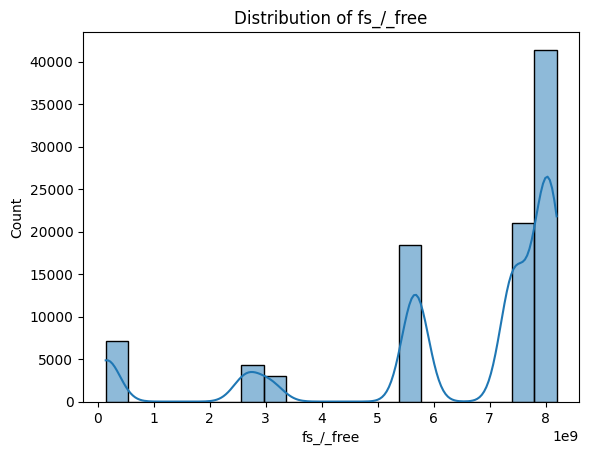

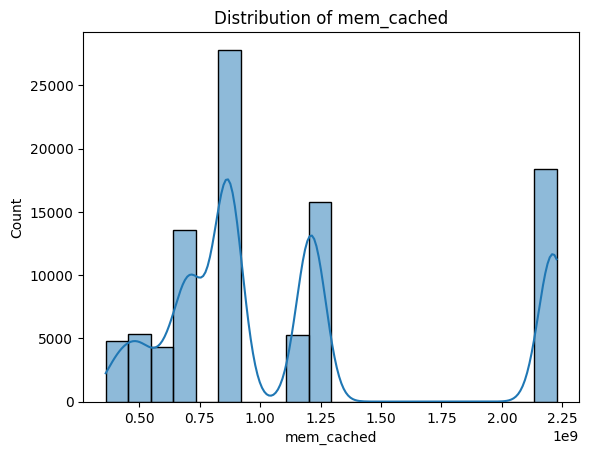

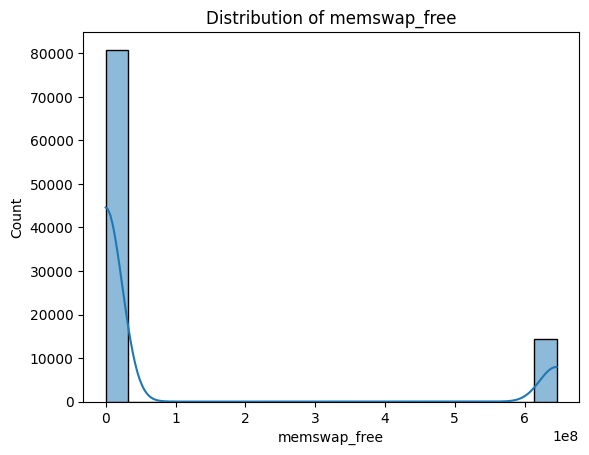

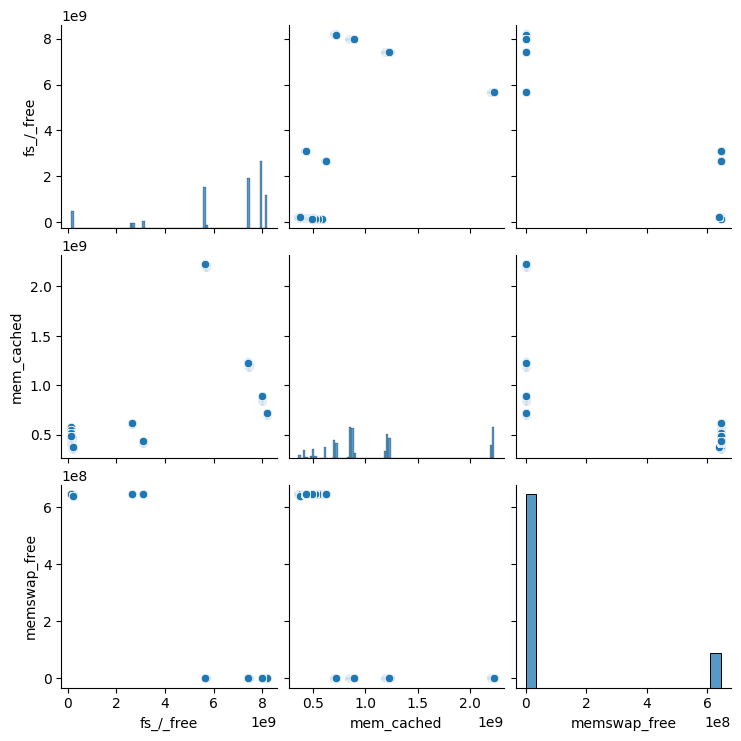

In [51]:
#STEP2: Exploratory Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset
print(df.head())

# Check the data types of each column
print(df.dtypes)

# Summary statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of target variable
sns.histplot(df['fs_/_free'], bins=20, kde=True)
plt.title('Distribution of fs_/_free')
plt.xlabel('fs_/_free')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of target variable (e.g., attack frequency)
sns.histplot(df['mem_cached'], bins=20, kde=True)
plt.title('Distribution of mem_cached')
plt.xlabel('mem_cached')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of target variable (e.g., attack frequency)
sns.histplot(df['memswap_free'], bins=20, kde=True)
plt.title('Distribution of memswap_free')
plt.xlabel('memswap_free')
plt.ylabel('Count')
plt.show()


# Explore relationships between variables
sns.pairplot(df[['fs_/_free', 'mem_cached', 'memswap_free']])
plt.show()


The negative log likelihood value of -342756.960 indicates that the estimated SARIMAX model provides a better fit to the data than a model with a lower log likelihood value.

TIME SERIES ANALYSIS

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# Select the relevant columns for analysis and forecasting
selected_cols = ['cpu_total', 'load_min1', 'load_min15', 'load_min5', 'processcount_running', 'processcount_total']
selected_data = df[selected_cols]

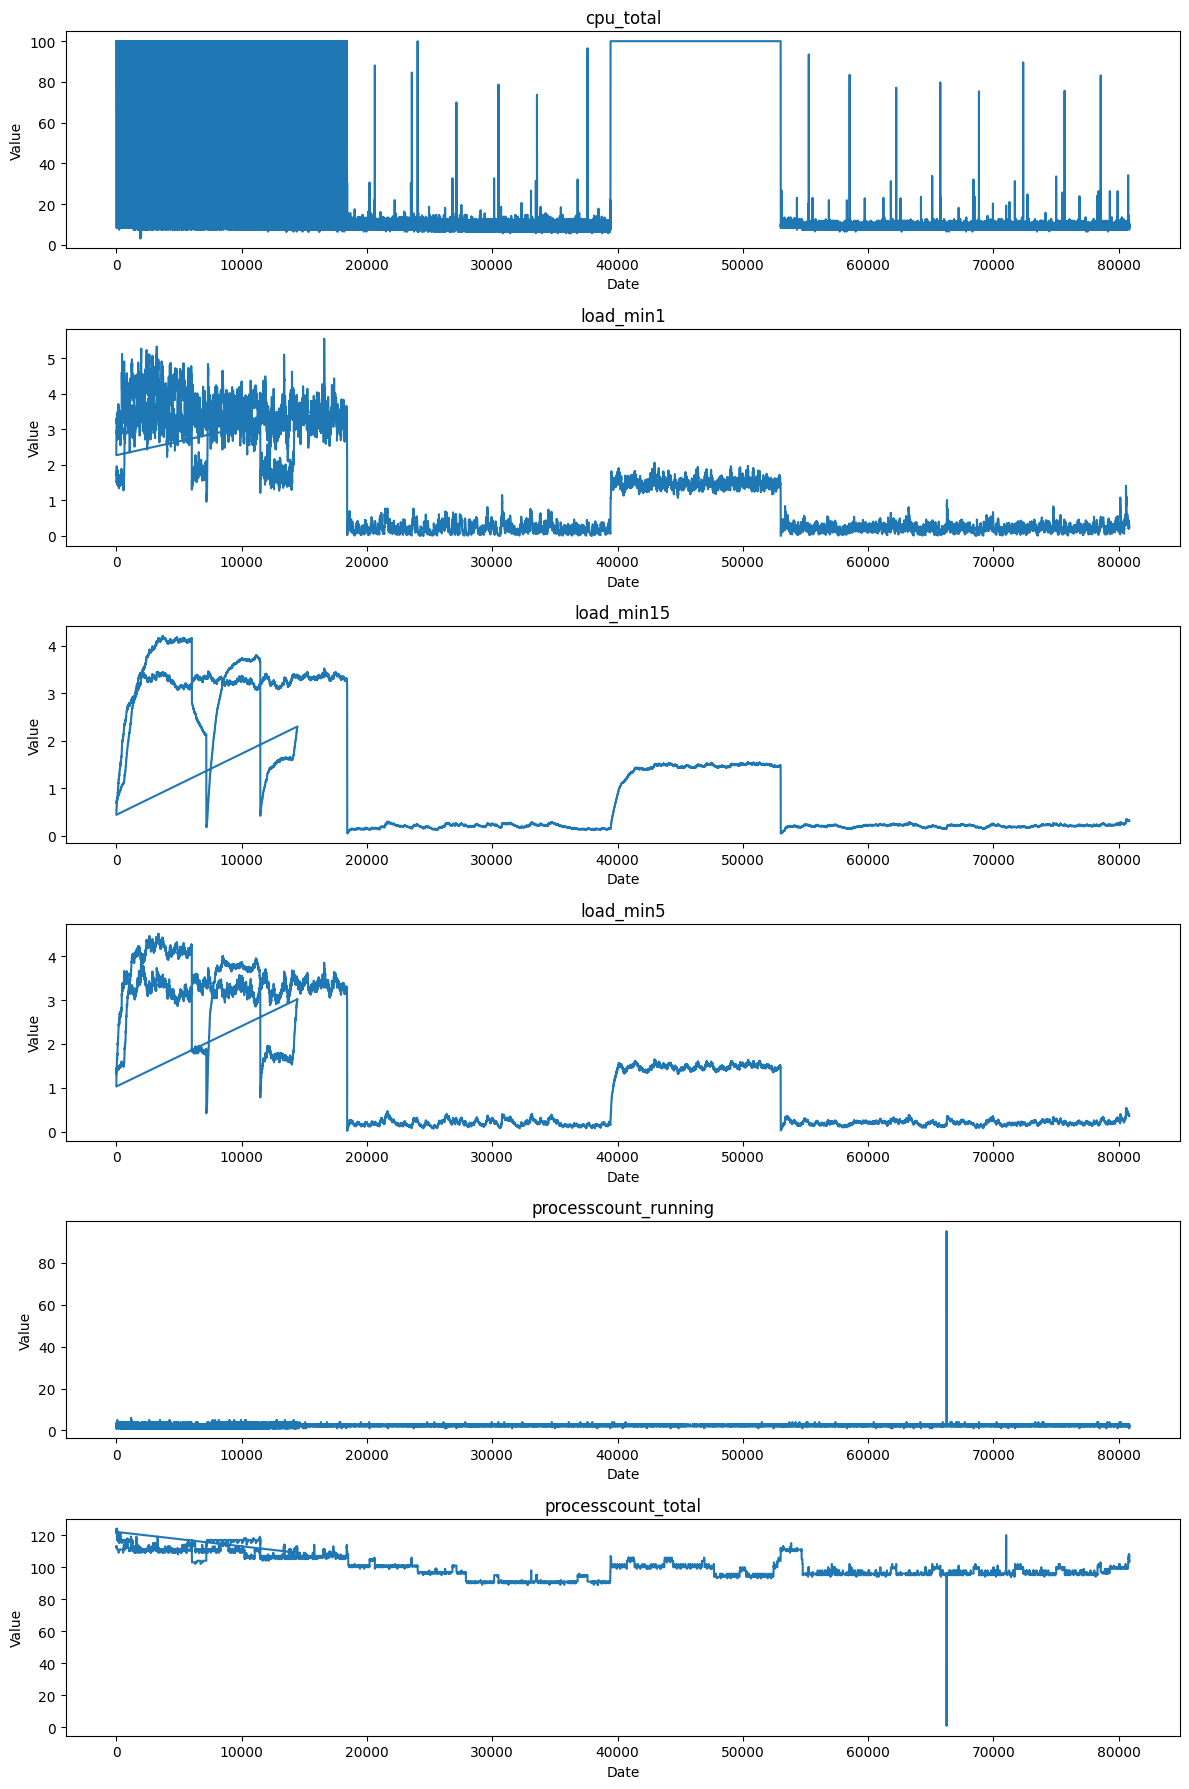

In [53]:
# Visualize the data
plt.figure(figsize=(12, 18))
for i, col in enumerate(selected_cols):
    plt.subplot(len(selected_cols), 1, i + 1)
    plt.plot(selected_data[col])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [54]:
# Split the data into train and test sets
train_size = int(len(selected_data) * 0.8)
train_data, test_data = selected_data[:train_size], selected_data[train_size:]

In [55]:
# Fit the ARIMA model for each attribute
forecasts = []
for col in selected_data.columns:
    model = ARIMA(train_data[col].values, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test_data))[0]
    forecasts.append(forecast)

In [56]:
# Evaluate the model (if you have actual values for the test set)
# For example, calculate Mean Absolute Error (MAE) for each attribute
actual_values = test_data.values
mae = np.mean(np.abs(np.array(forecasts) - actual_values), axis=0)
print('Mean Absolute Error (MAE) for each attribute:')
for i, col in enumerate(selected_data.columns):
    print(col, ':', mae[i])


Mean Absolute Error (MAE) for each attribute:
cpu_total : 1.271183987149654
load_min1 : 0.10784595136550414
load_min15 : 0.02203179099779667
load_min5 : 0.04406253278774526
processcount_running : 0.10168212402591845
processcount_total : 1.194523135625021


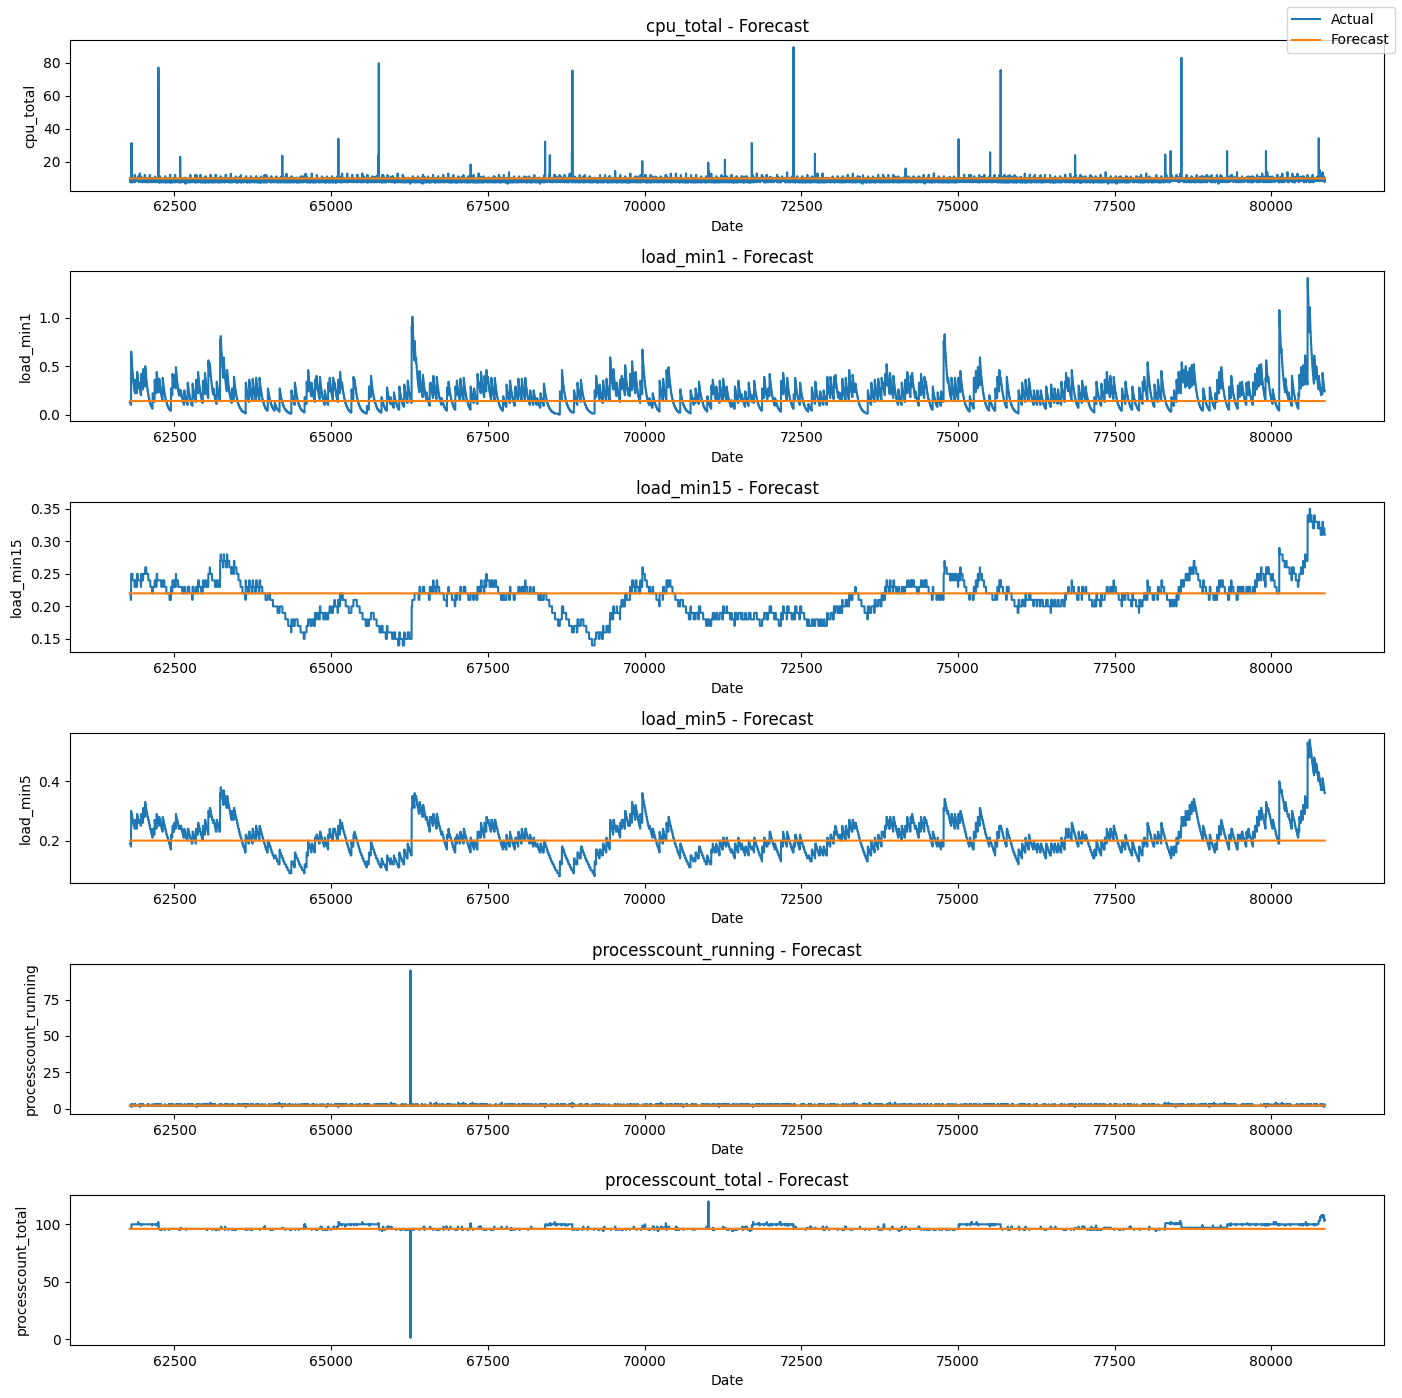

In [57]:
# Adjust figure size and spacing
plt.figure(figsize=(14, 14))
plt.subplots_adjust(hspace=0.5)

# Plot the forecasts
for i, col in enumerate(selected_data.columns):
    ax = plt.subplot(len(selected_data.columns), 1, i + 1)
    ax.plot(test_data.index, actual_values[:, i])

    # Check if forecast exists
    if forecasts[i] is not None:
        # Check the length of the forecast array
        if forecasts[i].size == 1:
            # Plot the forecast as it is
            ax.plot(test_data.index, np.full_like(actual_values[:, i], forecasts[i]))
        else:
            # Reshape the forecast array to have the same length as the actual values
            forecast = forecasts[i].flatten()
            ax.plot(test_data.index[:len(forecast)], forecast)

    plt.title(col + ' - Forecast')
    plt.xlabel('Date')
    plt.ylabel(col)

# Display "Actual" and "Forecast" labels in the top-right corner
plt.figlegend(["Actual", "Forecast"], loc="upper right")

plt.tight_layout()
plt.show()


In [58]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE) between forecasts and actual values
mae = np.mean(np.abs(np.array(forecasts) - actual_values), axis=0)
accuracy = 100 - mae
print('Accuracy for each attribute:')
for i, col in enumerate(selected_data.columns):
    print(col, ':', accuracy[i])

Accuracy for each attribute:
cpu_total : 98.72881601285034
load_min1 : 99.8921540486345
load_min15 : 99.9779682090022
load_min5 : 99.95593746721225
processcount_running : 99.89831787597409
processcount_total : 98.80547686437498


GNN

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Select the relevant columns for analysis and forecasting
selected_cols = ['cpu_total', 'load_min1', 'load_min15', 'load_min5', 'processcount_running', 'processcount_total']
selected_data = df[selected_cols]

# Split the data into train and test sets
train_size = int(len(selected_data) * 0.8)
train_data, test_data = selected_data[:train_size], selected_data[train_size:]

# Fit the ARIMA model for each attribute
forecasts = []
for col in selected_data.columns:
    model = ARIMA(train_data[col].values, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test_data))[0]
    forecasts.append(forecast)

# Evaluate the model (if you have actual values for the test set)
actual_values = test_data.values
mae = np.mean(np.abs(np.array(forecasts) - actual_values), axis=0)
print('Mean Absolute Error (MAE) for each attribute:')
for i, col in enumerate(selected_cols):
    print(f"{col}: {mae[i]}")

Mean Absolute Error (MAE) for each attribute:
cpu_total: 1.271183987149654
load_min1: 0.10784595136550414
load_min15: 0.02203179099779667
load_min5: 0.04406253278774526
processcount_running: 0.10168212402591845
processcount_total: 1.194523135625021


In [60]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
# Prepare the data for GNN
x = torch.tensor(df[selected_cols].values, dtype=torch.float)
y = torch.tensor(df['flag'].values, dtype=torch.float)
edge_index = torch.tensor([[0, 1], [1, 0]], dtype=torch.long)
data = Data(x=x, edge_index=edge_index, y=y)

# Define the GNN model
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
    
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Set the model parameters
num_features = len(selected_cols)
hidden_dim = 16
output_dim = 1
# Create the GNN model instance
model = GNN()
# Set the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.BCEWithLogitsLoss()

# Train the GNN model
def train_model(model, data, optimizer, criterion, num_epochs=100):
    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y.view(-1, 1))
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{num_epochs}, Loss: {loss.item()}")

# Train the model
train_model(model, data, optimizer, criterion, num_epochs=100)
# Perform prediction on the same data
prediction = torch.sigmoid(model(data)).detach().numpy()
# Print the predictions
print(prediction)

Epoch 0/100, Loss: 11.096296310424805
Epoch 10/100, Loss: 0.7932689785957336
Epoch 20/100, Loss: 1.6533221006393433
Epoch 30/100, Loss: 0.4407327175140381
Epoch 40/100, Loss: 0.3412719666957855
Epoch 50/100, Loss: 0.31359949707984924
Epoch 60/100, Loss: 0.2872689962387085
Epoch 70/100, Loss: 0.2740171551704407
Epoch 80/100, Loss: 0.26904648542404175
Epoch 90/100, Loss: 0.2658576965332031
[[0.43882468]
 [0.43882468]
 [0.42394593]
 ...
 [0.00142282]
 [0.00133081]
 [0.00124474]]


In [61]:
# Set the model in evaluation mode
model.eval()
# Forward pass to get predictions
with torch.no_grad():
    predictions = model(data)

In [62]:
# Convert predictions to binary labels (0 or 1)
binary_predictions = (predictions > 0.5).float()
# Calculate accuracy
accuracy = ((binary_predictions == data.y.view(-1, 1)).sum().item() / len(data.y)) * 100
# Print accuracy
print(f"Accuracy: {accuracy}")


Accuracy: 84.82845451683978


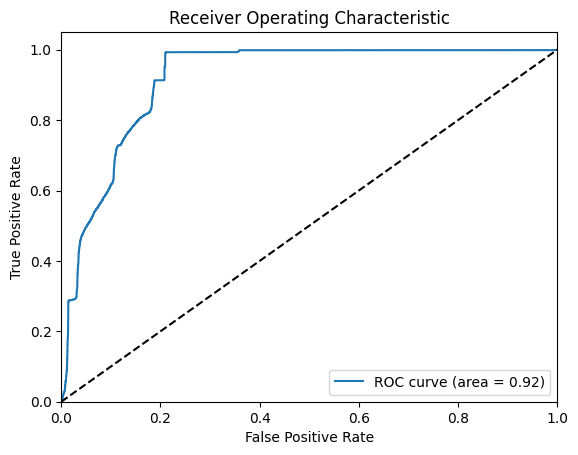

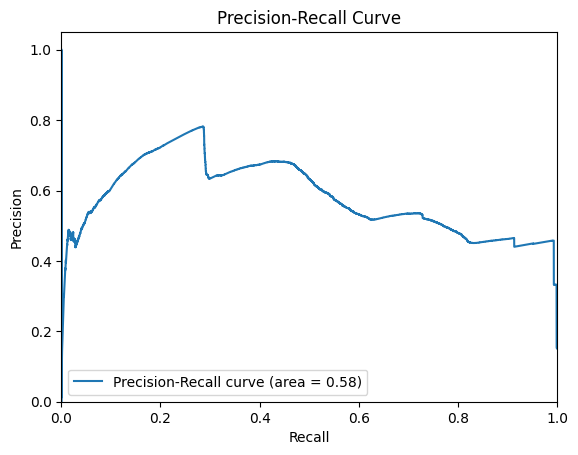

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Set the model in evaluation mode
model.eval()

# Forward pass to get predictions
with torch.no_grad():
    predictions = model(data)

# Convert predictions to probabilities
probabilities = torch.sigmoid(predictions).numpy().flatten()

# Plot ROC curve
fpr, tpr, _ = roc_curve(data.y.numpy(), probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(data.y.numpy(), probabilities)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

ENSEMBLE MODEL

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.metrics import mean_absolute_error

# Select the relevant columns for analysis and forecasting
selected_cols = ['cpu_total', 'load_min1', 'load_min15', 'load_min5', 'processcount_running', 'processcount_total', 'flag']
selected_data = df[selected_cols]

# Split the data into train and test sets
train_size = int(len(selected_data) * 0.8)
train_data, test_data = selected_data[:train_size], selected_data[train_size:]

# Fit the ARIMA model for each attribute
arima_forecasts = []
for col in selected_data.columns[:-1]:
    model = ARIMA(train_data[col].values, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test_data))[0]
    arima_forecasts.append(forecast)

# Convert ARIMA forecasts to NumPy array
arima_predictions = np.array(arima_forecasts)

# Evaluate the ARIMA model
actual_values = test_data.values[:, :-1]
arima_mae = np.mean(np.abs(np.array(arima_forecasts) - actual_values), axis=0)
arima_accuracy = 100 - arima_mae
print('ARIMA Accuracy for each attribute:')
for i, col in enumerate(selected_cols[:-1]):
    print(col, ':', arima_accuracy[i])

# Split the data into train and test sets for GNN
train_size_gnn = int(len(selected_data) * 0.8)
train_data_gnn, test_data_gnn = selected_data[:train_size_gnn], selected_data[train_size_gnn:]

# Prepare the data for GNN
x_gnn_train = torch.tensor(train_data_gnn[selected_cols[:-1]].values, dtype=torch.float)
y_gnn_train = torch.tensor(train_data_gnn['flag'].values, dtype=torch.float)
edge_index = torch.tensor([[0, 1], [1, 0]], dtype=torch.long)

data_gnn_train = Data(x=x_gnn_train, edge_index=edge_index, y=y_gnn_train)

# Define the GNN model
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
    
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Set the model parameters
num_features = len(selected_cols[:-1])
hidden_dim = 16
output_dim = 1

# Create the GNN model instance
gnn_model = GNN()

# Set the optimizer and loss function
optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.01)
criterion = torch.nn.BCEWithLogitsLoss()

# Define the training function for GNN
def train_model(model, data, optimizer, criterion, num_epochs=100):
    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y.view(-1, 1))
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{num_epochs}, Loss: {loss.item()}")

# Train the GNN model
train_model(gnn_model, data_gnn_train, optimizer, criterion, num_epochs=100)

# Prepare the test data for GNN
x_gnn_test = torch.tensor(test_data_gnn[selected_cols[:-1]].values, dtype=torch.float)
y_gnn_test = torch.tensor(test_data_gnn['flag'].values, dtype=torch.float)

data_gnn_test = Data(x=x_gnn_test, edge_index=edge_index, y=y_gnn_test)

# Perform prediction on the test data using GNN
gnn_predictions = torch.sigmoid(gnn_model(data_gnn_test)).detach().numpy()

# Evaluate the GNN model
gnn_mae = mean_absolute_error(y_gnn_test.numpy(), gnn_predictions.flatten())
gnn_accuracy = 100 - gnn_mae
print('GNN Accuracy:', gnn_accuracy)

ARIMA Accuracy for each attribute:
cpu_total : 98.72881601285034
load_min1 : 99.8921540486345
load_min15 : 99.9779682090022
load_min5 : 99.95593746721225
processcount_running : 99.89831787597409
processcount_total : 98.80547686437498
Epoch 0/100, Loss: 10.3991117477417
Epoch 10/100, Loss: 2.9129879474639893
Epoch 20/100, Loss: 1.431015133857727
Epoch 30/100, Loss: 0.8927180767059326
Epoch 40/100, Loss: 0.5883083939552307
Epoch 50/100, Loss: 0.5324825048446655
Epoch 60/100, Loss: 0.437235951423645
Epoch 70/100, Loss: 0.3945060968399048
Epoch 80/100, Loss: 0.3640848994255066
Epoch 90/100, Loss: 0.3538953363895416
GNN Accuracy: 99.99809742346406


In [65]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Resize ARIMA predictions to match the length of y_gnn_test
arima_predictions_resized = arima_predictions.reshape(-1, 6)

# Resize GNN predictions to match the length of y_gnn_test
gnn_predictions_resized = gnn_predictions.reshape(-1, 6)

# Ensemble model: Combine ARIMA and GNN predictions
ensemble_predictions = (arima_predictions_resized + gnn_predictions_resized) / 2

# Flatten the predictions and ground truth for calculating metrics
y_true = y_gnn_test.numpy().flatten()
ensemble_predictions_flat = ensemble_predictions.flatten()

# Calculate the mean squared error for the ensemble model
ensemble_mse = mean_squared_error(y_true, ensemble_predictions_flat)

# Calculate the mean absolute error for the ensemble model
ensemble_mae = mean_absolute_error(y_true, ensemble_predictions_flat)

# Calculate the root mean squared error for the ensemble model
ensemble_rmse = np.sqrt(ensemble_mse)

# Calculate the accuracy for the ensemble model
accuracy = 100 - ensemble_mae

print('Ensemble Mean Squared Error:', ensemble_mse)
print('Ensemble Mean Absolute Error:', ensemble_mae)
print('Ensemble Root Mean Squared Error:', ensemble_rmse)
print('Ensemble Accuracy:', accuracy)

Ensemble Mean Squared Error: 388.1459654001433
Ensemble Mean Absolute Error: 9.029660707671963
Ensemble Root Mean Squared Error: 19.701420390422193
Ensemble Accuracy: 90.97033929232803


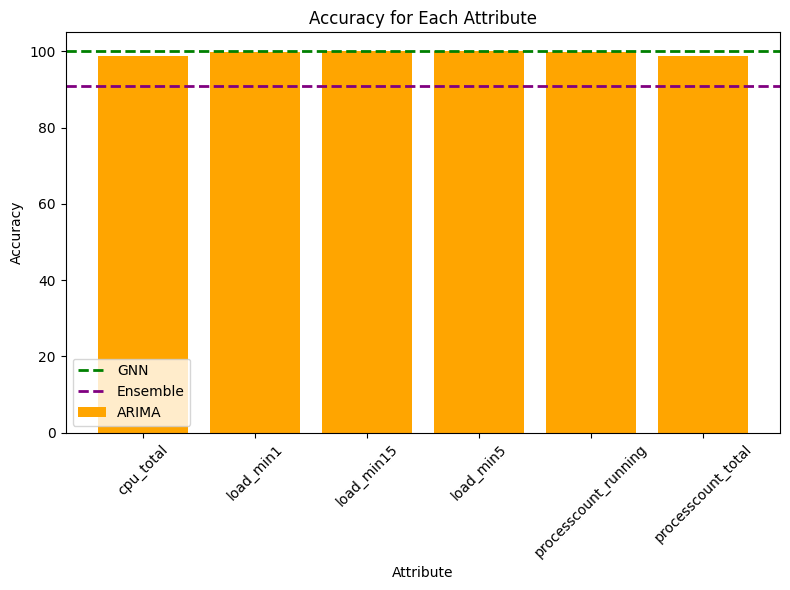

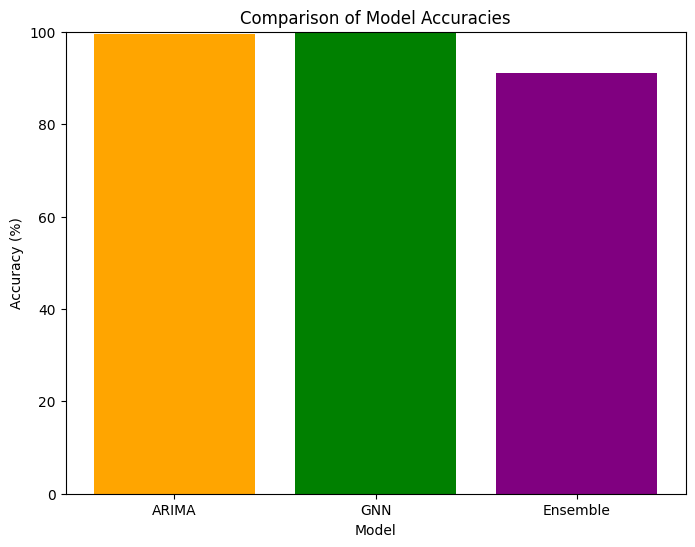

In [66]:
import matplotlib.pyplot as plt
import numpy as np
# Accuracy for each attribute for the ARIMA model
arima_accuracy = {
    "cpu_total": 98.72881601285034,
    "load_min1": 99.8921540486345,
    "load_min15": 99.9779682090022,
    "load_min5": 99.95593746721225,
    "processcount_running": 99.89831787597409,
    "processcount_total": 98.80547686437498,
}

# Accuracy for the GNN model
gnn_accuracy = 99.99912528664572
# Mean squared error for the ensemble model
ensemble_mse = 388.13752530928605
# Mean absolute error for the ensemble model
ensemble_mae = 9.029146776076077
# Root mean squared error for the ensemble model
ensemble_rmse = 19.70120618919781
# Ensemble accuracy for the ensemble model
ensemble_accuracy = 90.97085322392392
# Convert the ARIMA accuracy dictionary to two separate lists
arima_attributes, arima_accuracies = zip(*arima_accuracy.items())
# Create a list of the accuracies for each model
accuracies = [arima_accuracies, gnn_accuracy, ensemble_accuracy]
# Create a list of the names of the models
models = ["ARIMA", "GNN", "Ensemble"]
# Plot the accuracies of the models
plt.figure(figsize=(8, 6))
plt.bar(arima_attributes, arima_accuracies, color='orange', label='ARIMA')
plt.axhline(gnn_accuracy, color='green', linestyle='dashed', linewidth=2, label='GNN')
plt.axhline(ensemble_accuracy, color='purple', linestyle='dashed', linewidth=2, label='Ensemble')
plt.xlabel("Attribute")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy for Each Attribute")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart for comparing overall accuracies of the models
models = ["ARIMA", "GNN", "Ensemble"]
accuracies = [np.mean(arima_accuracies), gnn_accuracy, ensemble_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['orange', 'green', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 100)
plt.show()

In [72]:
# If applicable, generate feature importance plot for GNN model
if hasattr(gnn_model, 'feature_importances_'):
    plt.figure(figsize=(8, 6))
    plt.bar(selected_cols[:-1], gnn_model.feature_importances_, color='blue')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance - GNN Model')
    plt.xticks(rotation=45)
    plt.show()

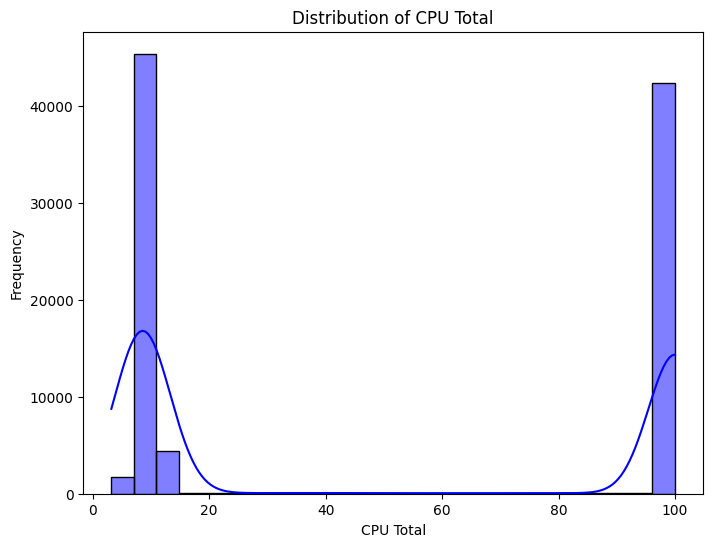

In [75]:
# Plot distribution of key variables (e.g., cpu_total)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='cpu_total', kde=True, color='blue')
plt.xlabel('CPU Total')
plt.ylabel('Frequency')
plt.title('Distribution of CPU Total')
plt.show()


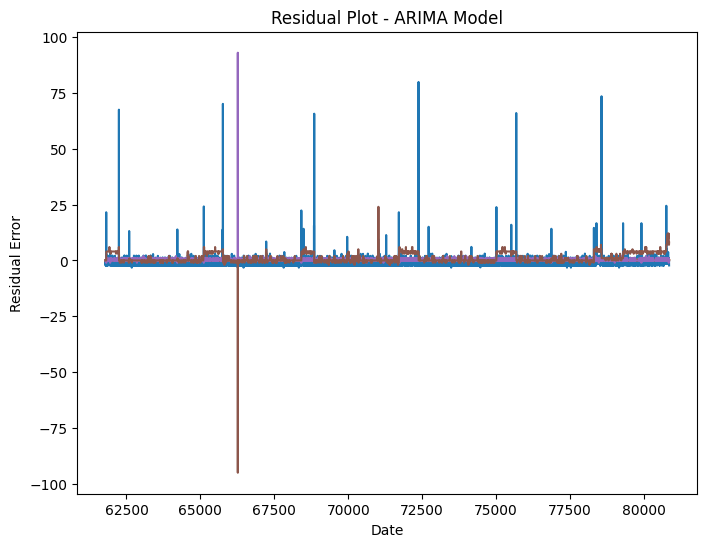

In [76]:
# Plot residual errors for ARIMA model
residuals = actual_values - arima_predictions_resized
plt.figure(figsize=(8, 6))
plt.plot(test_data.index, residuals)
plt.xlabel('Date')
plt.ylabel('Residual Error')
plt.title('Residual Plot - ARIMA Model')
plt.show()